In [2]:
from __future__ import division
import numpy as np
import os, sys
import matplotlib
#matplotlib.use('Agg')
%matplotlib nbagg
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
import subprocess
from scipy.signal import periodogram

def getCDF(data):
    xdata = np.sort(data)
    ydata = [i/len(xdata) for i in range(len(xdata))]
    return xdata, ydata

In [3]:
arr = [1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,
      1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1]

### autocorrelation try

In [4]:
res = np.correlate(arr, arr, mode='full')
res[res.size/2:]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


array([60, 30,  0, 29, 58, 29,  0, 28, 56, 28,  0, 27, 54, 27,  0, 26, 52,
       26,  0, 25, 50, 25,  0, 24, 48, 24,  0, 23, 46, 23,  0, 22, 44, 22,
        0, 21, 42, 21,  0, 20, 40, 20,  0, 19, 38, 19,  0, 18, 36, 18,  0,
       17, 34, 17,  0, 16, 32, 16,  0, 15, 30, 15,  0, 14, 28, 14,  0, 13,
       26, 13,  0, 12, 24, 12,  0, 11, 22, 11,  0, 10, 20, 10,  0,  9, 18,
        9,  0,  8, 16,  8,  0,  7, 14,  7,  0,  6, 12,  6,  0,  5, 10,  5,
        0,  4,  8,  4,  0,  3,  6,  3,  0,  2,  4,  2,  0,  1,  2,  1])

In [5]:
def autocorr(x, t=1):
    numpy.corrcoef(numpy.array([x[0:len(x)-t], x[t:len(x)]]))

In [6]:
# every 20 sec
arr2 = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
       1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]

In [7]:
res = np.correlate(arr2, arr2, mode='full')
res[res.size/2:]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


array([6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

# FREQUENCY RESAMPLING
- https://scicomp.stackexchange.com/questions/593/how-do-i-take-the-fft-of-unevenly-spaced-data


# ACTIVE FREQ ANALYSIS
- smartthings + door sensor at 14 hrs

In [8]:
filename = '/Users/sgrover/Projects/IoT/data/IoT_long_dumps/smartthings_doorsensor_20160703_14hr.pcap'
outfile = '/Users/sgrover/Projects/IoT/oit-dns/processed/tshark_extract/smartthings_doorsensor_20160703_14hr.csv'

cmd = 'tshark -r '+filename+' -E separator="|" -T fields -e frame.time_relative \
-e ip.src -e ip.dst -e dns.qry.name -Y "dns.flags.response eq 0" > '+outfile

#subprocess.check_call(cmd, shell=True)

In [9]:
df = pd.read_csv('processed/tshark_extract/smartthings_doorsensor_20160703_14hr.csv', sep='|',
                 names=['time', 'srcip', 'dstip', 'dnsquery'], )

In [10]:
# filter to smartthings device outgoing traffic only

df_dev = df[df['srcip']=="10.42.0.89"]
q1 = df_dev[df_dev['dnsquery']=='pool.ntp.org']

<IPython.core.display.Javascript object>


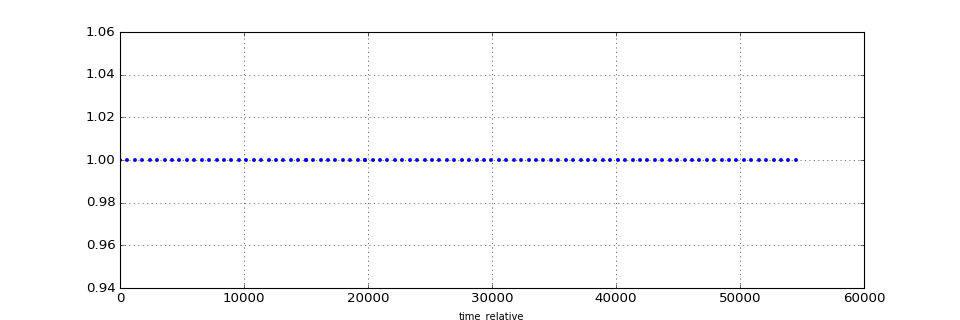

In [11]:
fig1, ax1 = plt.subplots(figsize=(12,4))

ax1.grid(1)
ax1.set_xlabel('time_relative', fontsize = 9)
ax1.plot(list(q1['time']), [1]*len(q1), '.' )

fig1.show()

In [13]:
#q1[['time', 'dnsquery']]

# Resampling and FFT periodogram
- determine best resampling interval using min(time_diff)/2 between samples
- resample using bincount
- get periodogram to determine frequency (Hz) with highest PSD
- inverse of above freq is the time period

In [14]:
x = np.array( list( q1['time'] ) )

np.diff(x)

array([ 598.809091,  598.803936,  598.817354,  598.820648,  598.824248,
        598.823605,  598.817141,  598.818303,  598.822792,  598.822442,
        598.82218 ,  598.833675,  598.836833,  598.837777,  598.833974,
        598.833299,  598.822783,  598.830745,  598.836395,  598.834161,
        598.83132 ,  598.835726,  598.837023,  598.826955,  598.836311,
          5.995314,  598.706026,  598.832503,  598.838983,  598.836336,
        598.827224,  598.838732,  598.830585,  598.83007 ,    6.004207,
        598.67837 ,  598.824478,  598.816892,  598.82216 ,  598.823585,
        598.831903,  598.82928 ,  598.829191,  598.826067,  598.820051,
        598.823445,  598.812955,  598.81481 ,  598.815309,  598.812413,
        598.821195,  598.815893,  598.815885,  598.82032 ,  598.817652,
        598.814466,  598.817558,  598.817963,  598.816984,  598.802882,
        598.810275,  598.81453 ,  598.813654,  598.811967,  598.811241,
        598.811203,  598.814603,  598.808619,  598.798777,  598.

In [15]:
Ts = np.min( np.diff(x) )/2
print Ts

fs = 1.0/Ts
print fs

y = np.bincount((x/Ts).astype(int))

2.997657
0.333593870146


In [16]:
# Use periodogram to determine peak

f, Pxx_den = periodogram(y, fs)

max_el = max([(v,i) for i,v in enumerate(Pxx_den)])
period_freq = f[max_el[1]-1]
print period_freq
period = 1.0 / period_freq 
print period

0.00165109152624
605.6599432


<IPython.core.display.Javascript object>


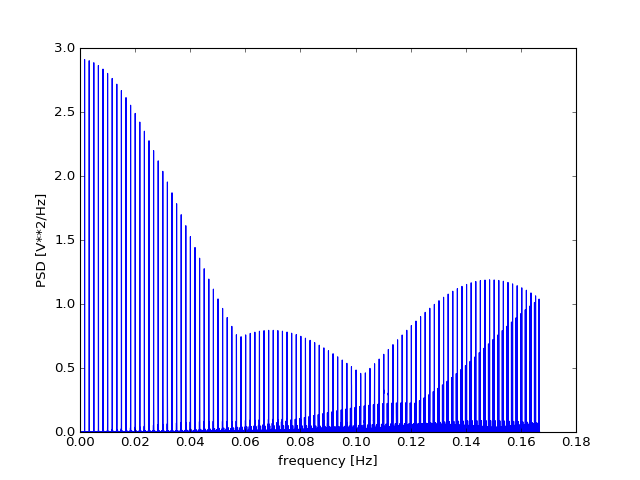

In [17]:
fig1, ax1 = plt.subplots()
ax1.plot(f, Pxx_den)
ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel('PSD [V**2/Hz]')
fig1.show()

In [18]:
# periodogram of random series

filename = '/Users/sgrover/Projects/IoT/data/device_dumps/normal_pc_usage/1427418026.pcap'
outfile = '/Users/sgrover/Projects/IoT/oit-dns/processed/tshark_extract/normal_pc_usage.csv'

cmd = 'tshark -r '+filename+' -E separator="|" -T fields -e frame.time_relative \
-e ip.src -e ip.dst -e dns.qry.name -Y "dns.flags.response eq 0" > '+outfile

#subprocess.check_call(cmd, shell=True)

In [36]:
df = pd.read_csv('processed/tshark_extract/normal_pc_usage.csv', sep='|',
                 names=['time', 'srcip', 'dstip', 'dnsquery'], )
df_dev = df[df['srcip']=="10.0.0.39"]

# make sure that particular DNS is present in AT LEAST half the total pcap time before getting period
time_arr = list( df_dev['time'] )
tot_time = time_arr[-1] - time_arr[0]

In [51]:
q2 = df_dev[df_dev['dnsquery']=='www.google.com']

time_arr = list( q2['time'] )
dns_time = time_arr[-1] - time_arr[0]
print dns_time, tot_time

86584.926371 86682.06242


Ts, fs =  1.0 1.0


<IPython.core.display.Javascript object>


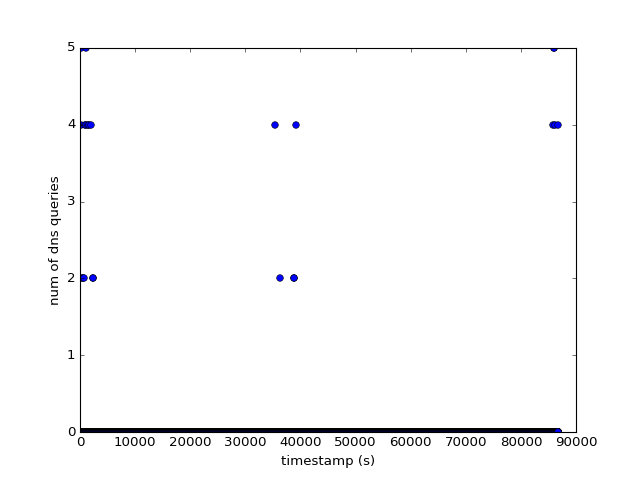

In [48]:
x = np.array( list(q2['time']) )
Ts = np.min( np.diff(x) )/2
# min Ts at least 1 second
if Ts < 1.0:
    Ts = 1.0
fs = 1.0/Ts
print "Ts, fs = ", Ts, fs


fig1, ax1 = plt.subplots()
ax1.plot(range(len(y)), y, 'o')
ax1.set_xlabel('timestamp (s)')
ax1.set_ylabel('num of dns queries')
fig1.show()

<IPython.core.display.Javascript object>


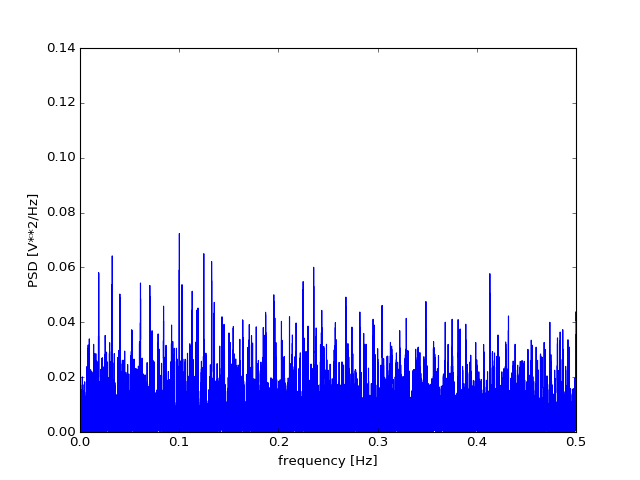

86703.0


In [52]:
y = np.bincount((x/Ts).astype(int))

f, Pxx_den = periodogram(y, fs)

fig1, ax1 = plt.subplots()
ax1.plot(f, Pxx_den)
ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel('PSD [V**2/Hz]')
fig1.show()

max_el = max([(v,i) for i,v in enumerate(Pxx_den)])
period_freq = f[max_el[1]-1]
period = 1.0 / period_freq

# make sure that period is AT MAX half of total pcap time - otherwise its not really a period
print period

In [60]:
def extract_period(time_list):
    x = np.array( time_list )
    Ts = np.min( np.diff(x) )/2
    # min Ts at least 1 second
    if Ts < 1.0:
        Ts = 1.0
    fs = 1.0/Ts
    print "Ts, fs = ", Ts, fs
    y = np.bincount((x/Ts).astype(int))
    
    f, Pxx_den = periodogram(y, fs)

    max_el = max([(v,i) for i,v in enumerate(Pxx_den)])
    period_freq = f[max_el[1]-1]
    period = 1.0 / period_freq 
    
    return period, f, Pxx_den, y

Ts, fs =  1.0 1.0
93 78180.968938 DB3MSGR5011104.gateway.messenger.live.com
period =  504.614457831


<IPython.core.display.Javascript object>


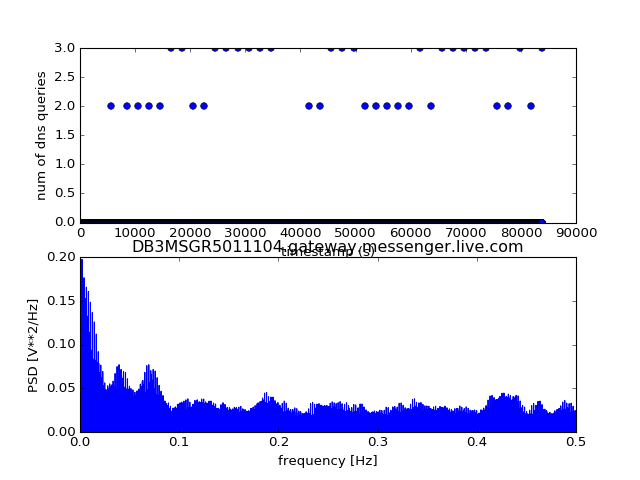

Ts, fs =  512.0015525 0.0019531190777
26 85872.058146 _ipps._tcp.local,_ipp._tcp.local
period =  3762.09836402


<IPython.core.display.Javascript object>


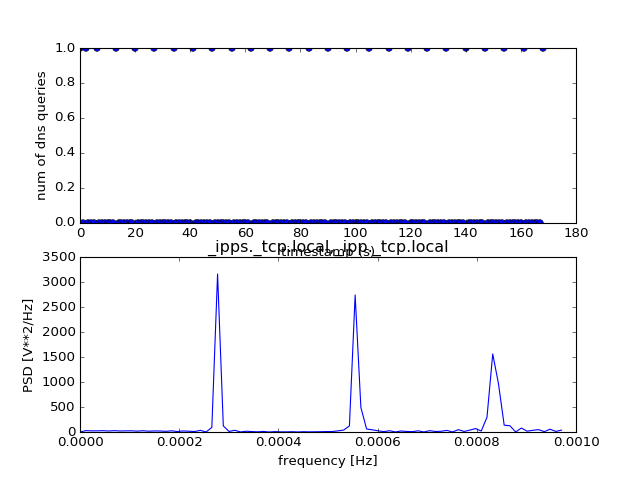

Ts, fs =  1.0 1.0
35 80874.889163 a.config.skype.com
period =  64.3391442155


<IPython.core.display.Javascript object>


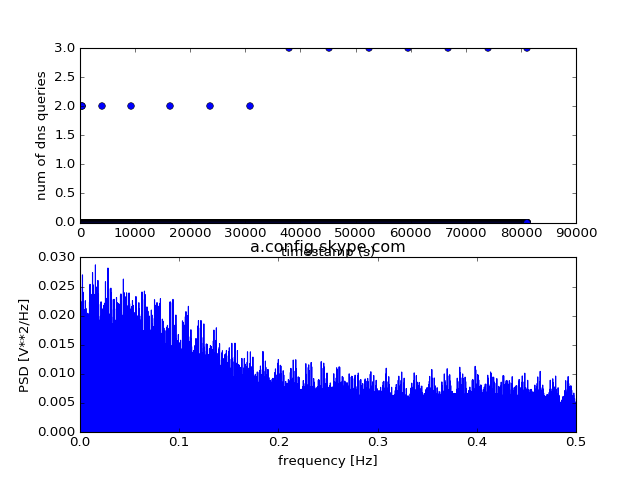

Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
36 84412.107333 b.config.skype.com
period =  29.890024674


<IPython.core.display.Javascript object>


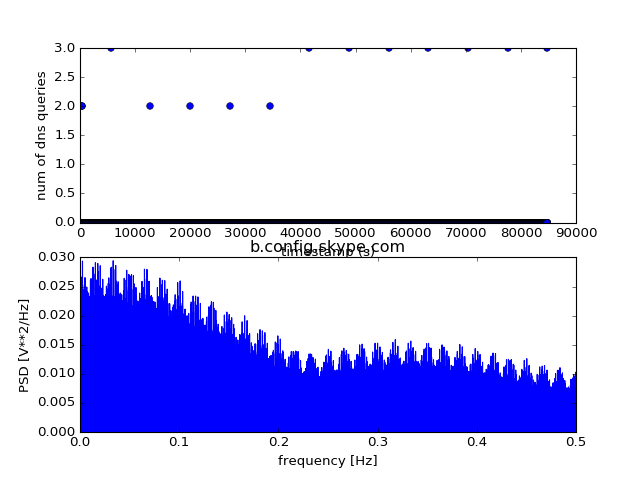

Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
14 85690.273318 creativecommons.org
period =  2.41925614035
Ts, fs =  1.0 1.0
13049 86656.096072 daisy.ubuntu.com
period =  30.0124610592


<IPython.core.display.Javascript object>


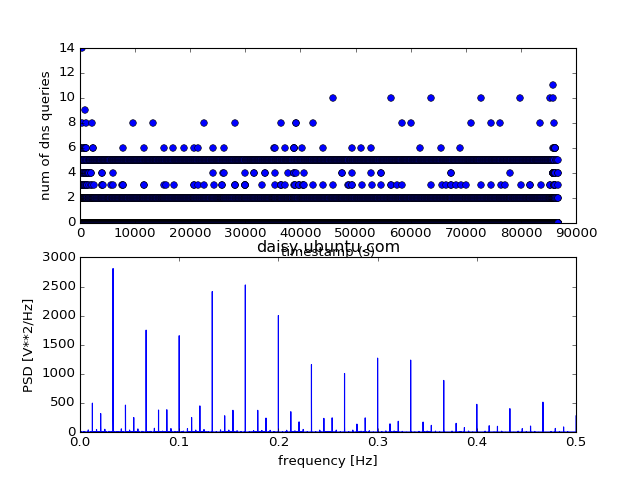

Ts, fs =  1.0 1.0
14 85558.836915 disqus.com
period =  2.00006921533
Ts, fs =  1.0 1.0
379 85754.82615 exchangeimap.princeton.edu
period =  602.412587413


<IPython.core.display.Javascript object>


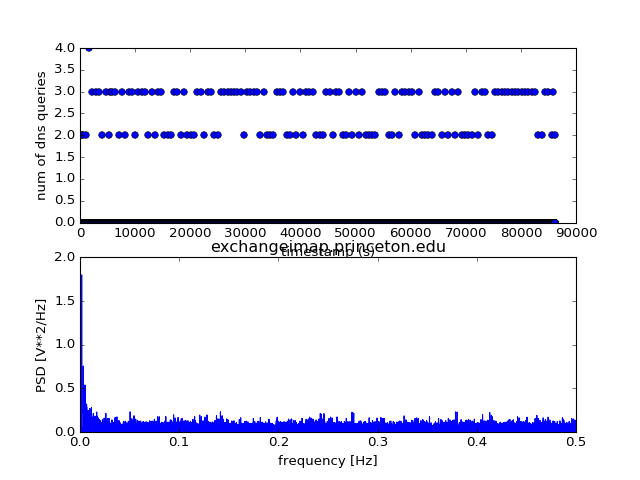

Ts, fs =  1.0 1.0
14 85364.684122 imap.cs.princeton.edu
period =  2.933198796
Ts, fs =  1.0 1.0
20 85324.655302 imap.googlemail.com
period =  2.11903584672
Ts, fs =  1.0 1.0
25 85237.178696 ocsp.digicert.com
period =  10669.375


<IPython.core.display.Javascript object>


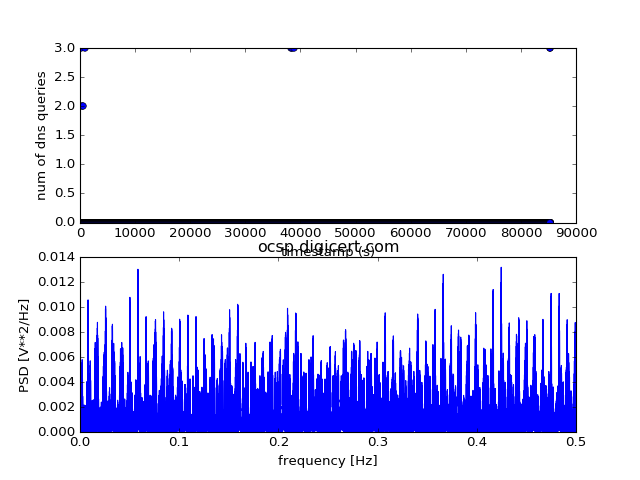

Ts, fs =  1.0 1.0
82 83382.290026 pipe.skype.com
period =  504.638554217


<IPython.core.display.Javascript object>


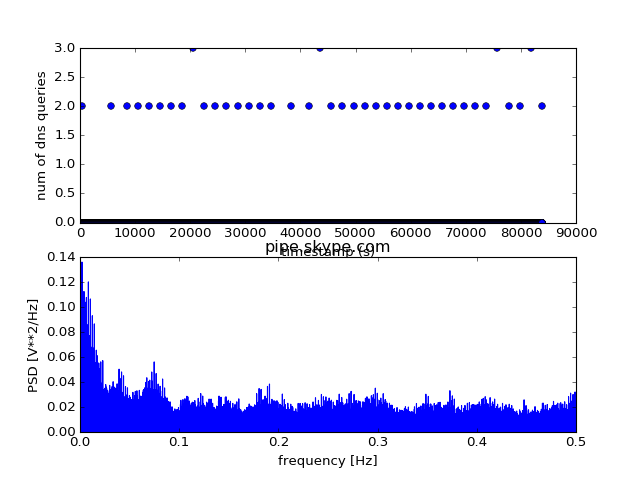

Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
307 84843.90769 safebrowsing-cache.google.com
period =  1853.02173913


<IPython.core.display.Javascript object>


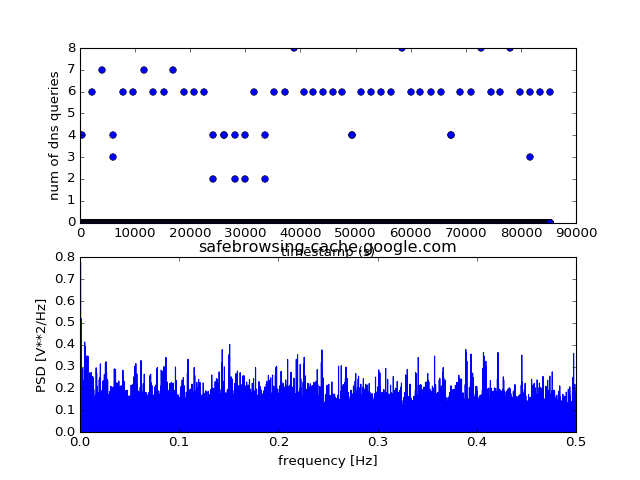

Ts, fs =  1.0 1.0
216 84843.695479 safebrowsing.google.com
period =  1853.02173913


<IPython.core.display.Javascript object>


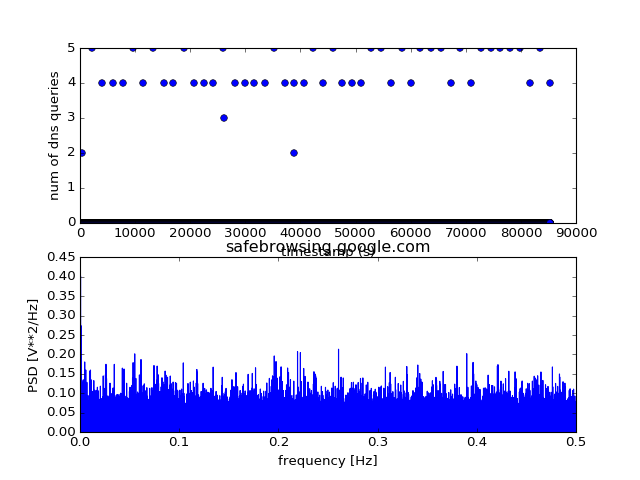

Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
14 85689.820045 ssl.gstatic.com
period =  2.05262654291
Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
12 85353.3485 twitter.com
period =  3.18029932578
Ts, fs =  1.0 1.0
12 72000.000229 ui.skype.com
period =  2.5000805594
Ts, fs =  1.0 1.0
12 85718.021247 www.facebook.com
period =  2.33952945646
Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
Ts, fs =  1.0 1.0
16 84642.928337 www.youtube.com
period =  9.94509170608


In [62]:
# separate each dns timeseries
# make sure that particular DNS is present in AT LEAST half the total pcap time before getting period

for query, d in df_dev.groupby('dnsquery'):
    #print len(d), query
    time_arr = list( d['time'] )
    dns_time = time_arr[-1] - time_arr[0]

    if (dns_time >= tot_time/2) and len(d) > 10:
        #period, f, Pxx_den, y = extract_period(list(d['time']))
        
        x = np.array( list(d['time']) )
        Ts = np.min( np.diff(x) )/2
        # min Ts at least 1 second
        if Ts < 1.0:
            Ts = 1.0
        fs = 1.0/Ts
        print "Ts, fs = ", Ts, fs
        y = np.bincount((x/Ts).astype(int))

        f, Pxx_den = periodogram(y, fs)

        max_el = max([(v,i) for i,v in enumerate(Pxx_den)])
        period_freq = f[max_el[1]-1]
        period = 1.0 / period_freq 
        
        if (period <= tot_time/2):
            print len(d), dns_time, query
            print "period = ",period
        
            if len(d)>20:
                fig1, axarr = plt.subplots(2)
                axarr[0].plot(range(len(y)), y, 'o')
                axarr[0].set_xlabel('timestamp (s)')
                axarr[0].set_ylabel('num of dns queries')

                axarr[1].plot(f, Pxx_den)
                axarr[1].set_xlabel('frequency [Hz]')
                axarr[1].set_ylabel('PSD [V**2/Hz]')
                axarr[1].set_title(query)
                
                fig1.show()
        

In [56]:
tot_time/2

43341.031210000001

In [57]:
period

9.9450917060791326

## NUFT - nfft

In [ ]:
from nfft import nfft

# define evaluation points
x = -0.5 + np.random.rand(1000)

# define Fourier coefficients
N = 10000
k = - N // 2 + np.arange(N)
f_k = np.random.randn(N)


# non-equispaced fast Fourier transform
f = nfft(x, f_k)

In [ ]:
# FFT Plot - Abhinav
N = y.size
fs = 1.0/Ts

freqs = scipy.fftpack.fftfreq(N, 1.0/fs)
freqs = scipy.fftpack.fftshift(freqs)
yf = 1.0/N * scipy.fftpack.fft(y)
yf = scipy.fftpack.fftshift(yf)

fig1, ax1 = plt.subplots()
ax1.plot(freqs, np.abs(yf))
ax1.set_xlabel('frequency')
ax1.set_ylabel('magnitude')
fig1.show()

In [ ]:
fourier = np.fft.fft(y)
n = y.size
timestep = 60.0

freq = np.fft.fftfreq(n, d=timestep)


In [ ]:
freq

In [ ]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi

t = scipy.linspace(0,120,4000)
acc = lambda t: 10*scipy.sin(2*pi*2.0*t) + 5*scipy.sin(2*pi*8.0*t) + 2*scipy.random.random(len(t))

signal = acc(t)

FFT = abs(scipy.fft(signal))
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])

fig1, axarr = plt.subplots(2)
axarr[0].plot(t, signal)
axarr[1].plot(freqs,20*scipy.log10(FFT),'x')
fig1.show()

In [ ]:
FFT

In [ ]:
t = scipy.linspace(0, 54507, y.size)
FFT = abs(scipy.fft(y))
freqs = scipy.fftpack.fftfreq(y.size, t[1]-t[0])

fig1, axarr = plt.subplots(2)
axarr[0].plot(t, y)
axarr[1].plot(freqs,20*scipy.log10(FFT),'x')
fig1.show()

In [ ]:
def get_frequency(time_series):
    